In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [68]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Pred_Y               int64
dtype: object

### ดูค่าสถิติพื้นฐานของแต่ละ features

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.mode()[:3]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.mode(numeric_only=1)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,850.0,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [10]:
df.Age.mode()

0    37
Name: Age, dtype: int64

In [11]:
df.Surname.mode()

0    Smith
Name: Surname, dtype: object

# Data type **Conversion**

In [12]:
df.RowNumber=df.RowNumber.astype('category')
df.CustomerId=df.CustomerId.astype('category')
df.HasCrCard=df.HasCrCard.astype('category')
df.IsActiveMember=df.IsActiveMember.astype('category')
df.Exited=df.Exited.astype('category')
df.NumOfProducts=df.NumOfProducts.astype('category')
df.Geography = df.Geography.astype('category')
df.Surname = df.Surname.astype('category')
df.Gender = df.Gender.astype('category')

In [13]:
df.dtypes

RowNumber          category
CustomerId         category
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

# แสดง Insight จากข้อมูล & Visualization

In [69]:
df.Geography.value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [71]:
# sns.pairplot(df, hue='Exited')

## Insight 1 : ดูว่าคนแต่ประเทศมีงบดุลกระจายกันเท่าไหร่บ้าง

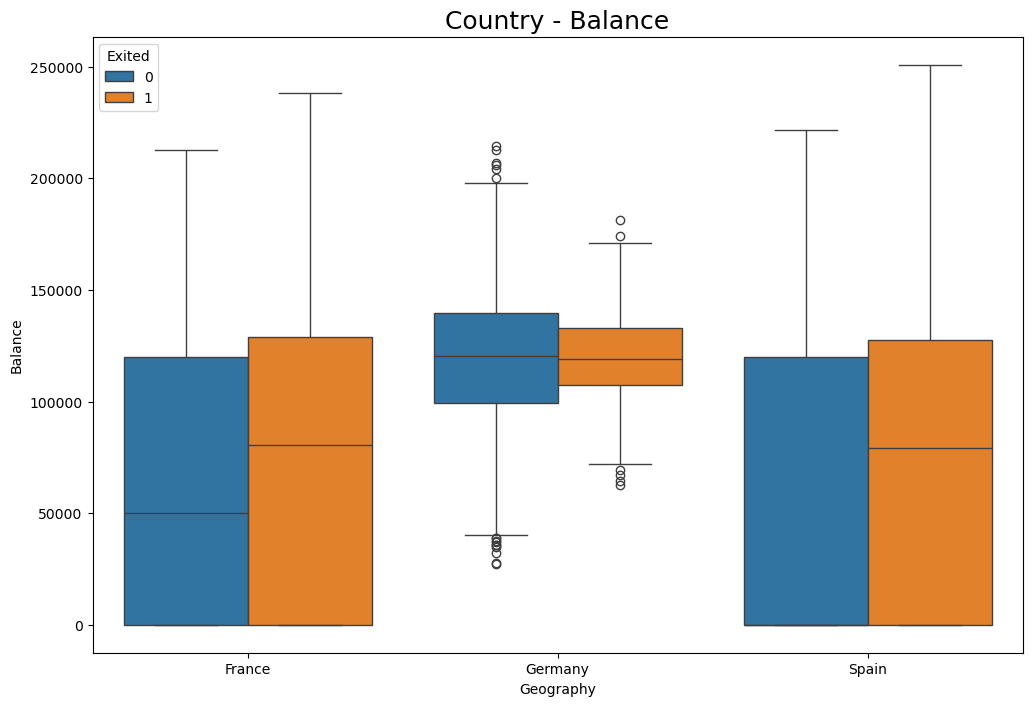

In [17]:
plt.figure(figsize=[12,8])
plt.title("Country - Balance", fontsize=18)
sns.boxplot(data=df, x='Geography', y='Balance', hue='Exited')
plt.show()

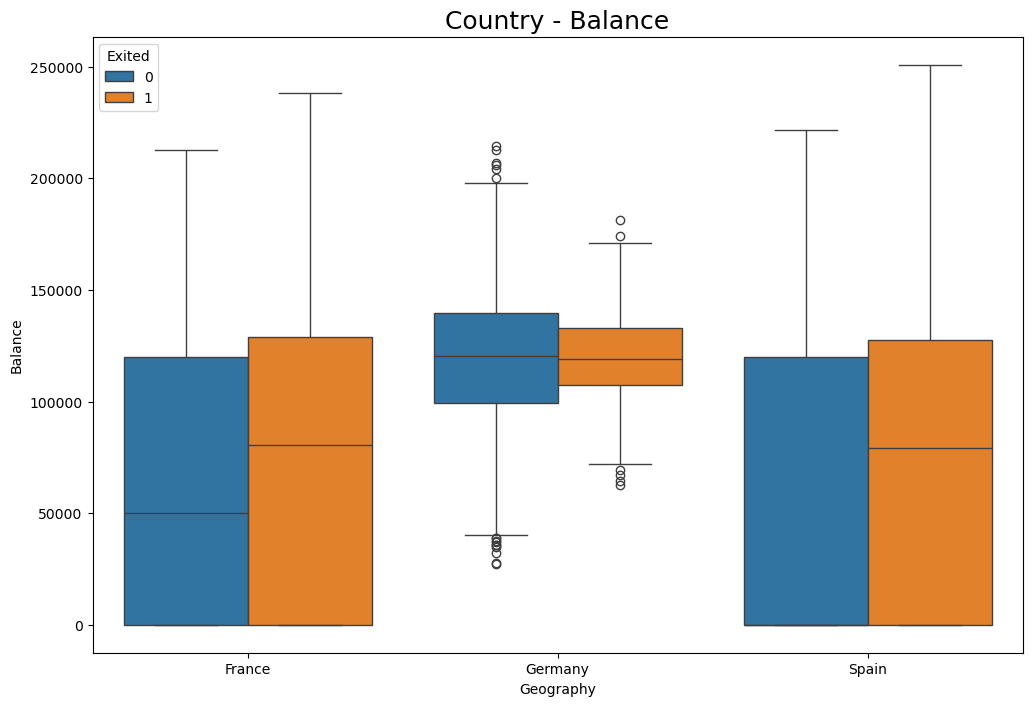

In [18]:
plt.figure(figsize=[12,8])
plt.title("Country - Balance", fontsize=18)
bp = sns.boxplot(data=df, x='Geography', y='Balance', hue='Exited')
# plt.show()
plt.savefig("Contry - Balance")
plt.show()

In [72]:
# df.Geography.plot.hist()
df[['Geography', 'Exited']]

,Geography,Exited
0,0,1
1,2,0
2,0,1
3,0,0
4,2,0
...,...,...
9995,0,0
9996,0,0
9997,0,1
9998,1,1


<Axes: xlabel='Geography', ylabel='Count'>

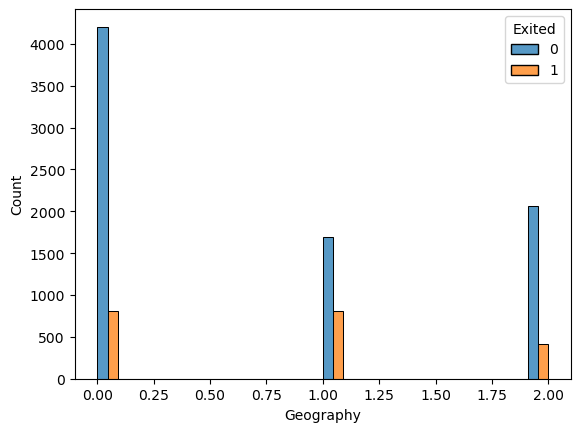

In [73]:
#df.Balance.hist()
sns.histplot(data=df, x='Geography', hue='Exited', multiple='dodge')

In [74]:
df.Geography.value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [79]:
#df.Geography.mean()

## Insight 2 : ดูว่าประเทศแต่ละประเทศมีงบดุลรวมกันเท่าไหร่ (ประเทศไหนรวย)

In [76]:
#df[['Geography', 'Balance']].groupby("Geography")
df[['Geography', 'Balance']].groupby("Geography").mean()

,Balance
Geography,
0,62092.636516
1,119730.116134
2,61818.147763


In [77]:
# df[['Geography', 'Balance', 'Exited']].groupby(["Geography"]).median()

In [82]:
df[['Geography', 'Balance', 'Exited']]. \
    groupby(["Geography", 'Exited']).median()

Balance
Geography Exited           
0         0        49853.57
          1        80376.46
1         0       120252.02
          1       118951.22
2         0            0.00
          1        79035.95

# Insight 3 : ดูว่าอายุช่วงไหนมีเงินที่มาก

In [85]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Pred_Y
0,619,0,0,42,2,0.00,0,1,1,101348.88,1,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1,0
3,699,0,0,39,1,0.00,1,0,0,93826.63,0,1
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64,0,0
9996,516,0,1,35,10,57369.61,0,1,1,101699.77,0,0
9997,709,0,0,36,7,0.00,0,0,1,42085.58,1,0
9998,772,1,1,42,3,75075.31,1,1,0,92888.52,1,0


<Axes: xlabel='Age', ylabel='Count'>

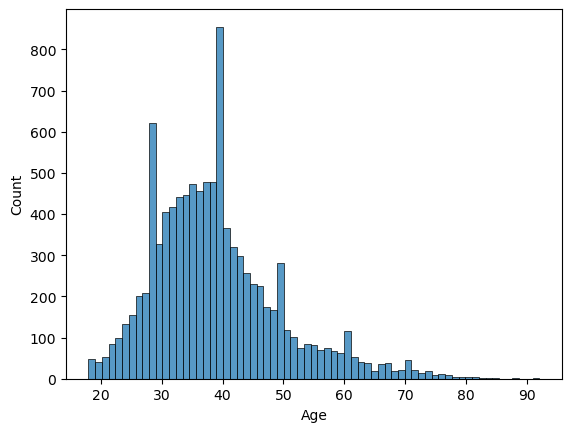

In [87]:
sns.histplot(data=df, x='Age')

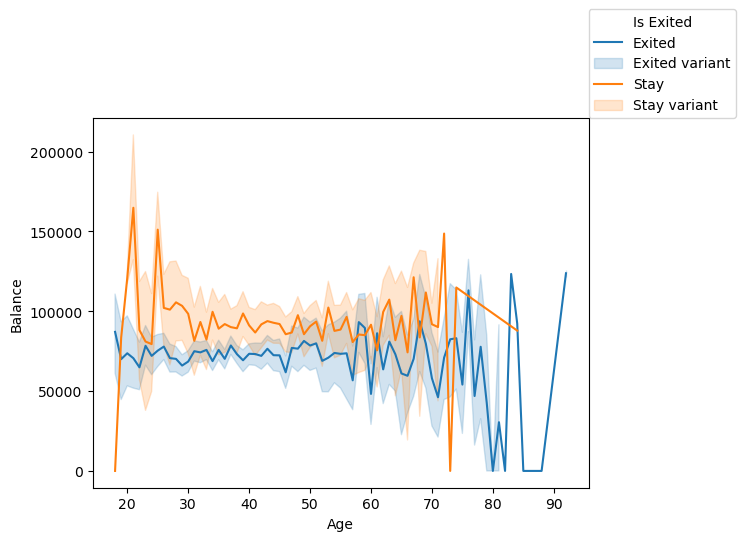

In [123]:
g = sns.lineplot(data=df, x='Age', y='Balance', hue='Exited',
            # legend=False)
                )
plt.legend(title='Is Exited', labels=['Exited', 'Exited variant', 'Stay', 'Stay variant'], loc=[1,1])

plt.show(g)


# Prediction 
### ใช้ Decision Tree Classifier เนื่องจากมีความแม่นยำหากมี features ข้อมูลไม่มากและ ข้อมูลจำนวนมาก

### วัตถุประสงค์ที่ต้องการทำนายคือ ทำนายว่าถ้ามีข้อมูล features ของคน ต่างๆจะสามารถทำนายว่าคนนี้จะ Exited (หนีการจ่ายหนี้) หรือไม่

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# models
# from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # DT

# evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.metrics import mean_squared_error



In [29]:
df.dtypes

RowNumber          category
CustomerId         category
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [30]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [31]:
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [32]:
# df.dtypes
le = LabelEncoder()
cat_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in cat_cols:
    le.fit(y=df[col])
    new_y = le.transform(df[col])
    # print(new_y)
    df[col] = new_y

In [57]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Pred_Y               int64
dtype: object

## Insight 4 : ข้อมูลตัวไหนมีความสำคัญต่อ output (Exited) มากสุด -> พิจารณาจาก correlation Matrix

<Axes: >

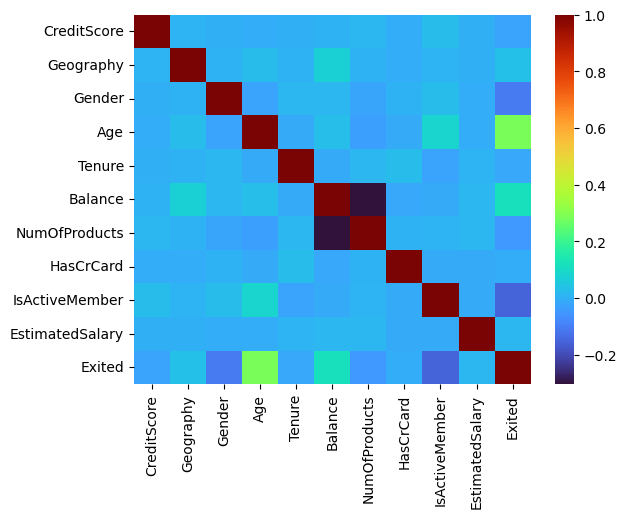

In [66]:
try:
    corr_mat = df.drop(columns=['Pred_Y']).corr()
except:
    corr_mat = df.corr()
sns.heatmap(corr_mat, cmap=plt.cm.turbo)

In [34]:
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7681,641,0,1,33,2,146193.60,1,1,1,55796.83
9031,541,0,1,39,7,0.00,1,1,0,19823.02
3691,590,0,0,76,5,160979.68,0,0,1,13848.58
202,516,2,1,50,5,0.00,0,0,1,146145.93
5625,508,0,0,60,7,143262.04,0,1,1,129562.74
...,...,...,...,...,...,...,...,...,...,...
9225,594,1,0,32,4,120074.97,1,1,1,162961.79
4859,794,2,0,22,4,114440.24,0,1,1,107753.07
3264,738,0,1,35,5,161274.05,1,1,0,181429.87
9845,590,2,0,38,9,0.00,1,1,1,148750.16


### Error of Test Data

In [36]:
# model = KNeighborsClassifier()
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test).astype(int)


acc = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
acc, precision, recall, f1

(0.7943333333333333,
 0.5028735632183908,
 0.5636070853462157,
 0.5315110098709187)

In [38]:
print("accuracy of model score = ", round(acc, 4))

accuracy of model score =  0.7943


In [39]:
error_test = mean_squared_error(y_pred, y_test)
print("Error comparing Test Data is ", error_test)

Error comparing Test Data is  0.20566666666666666


### Error of Train Data

In [40]:
y_train_pred = model.predict(X_train)


In [41]:
error_train = mean_squared_error(y_train_pred, y_train)
print("Error comparing Train Data is ", error_train)

Error comparing Train Data is  0.0


In [42]:
model.classes_

array([0, 1])

In [43]:
model.class_weight

In [44]:
model.feature_importances_

array([0.14512951, 0.03074557, 0.02055154, 0.22807767, 0.07970151,
       0.150646  , 0.11386297, 0.01647718, 0.05519783, 0.15961022])

In [45]:
y_pred_all = np.hstack((model.predict(X_train), y_pred))
y_pred_all.shape

(10000,)

In [46]:
df['Pred_Y'] = pd.Series(
y_pred_all).astype(int)

In [47]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Pred_Y
0,619,0,0,42,2,0.00,0,1,1,101348.88,1,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1,0
3,699,0,0,39,1,0.00,1,0,0,93826.63,0,1
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64,0,0
9996,516,0,1,35,10,57369.61,0,1,1,101699.77,0,0
9997,709,0,0,36,7,0.00,0,0,1,42085.58,1,0
9998,772,1,1,42,3,75075.31,1,1,0,92888.52,1,0


## Real Data vs Predicted Data

In [48]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Pred_Y'],
      dtype='object')

In [49]:
# for col in df.columns:
x = df.CreditScore
le.fit(df.Exited)
new_y = le.inverse_transform(df.Exited)
# y = df.Exited

# plt.scatter(y, x)
# sns.

In [50]:
# sns.regplot(data=df, x='CreditScore', y='Exited')
# sns.regplot(data=df, x='CreditScore', y='Pred_Y')

/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_15658/1736428630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.Exited)
/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_15658/1736428630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.Pred_Y)


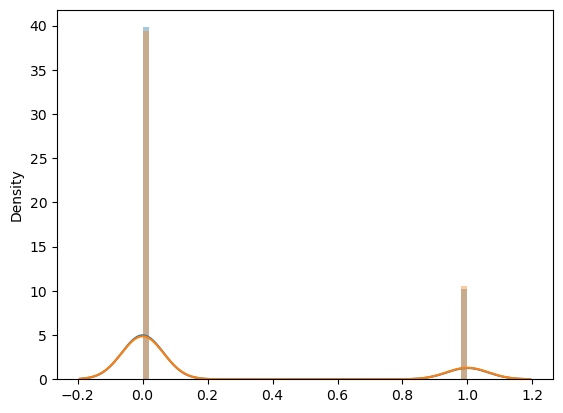

In [51]:
sns.distplot(x=df.Exited)
sns.distplot(x=df.Pred_Y)
plt.show()

<Axes: xlabel='Exited', ylabel='Count'>

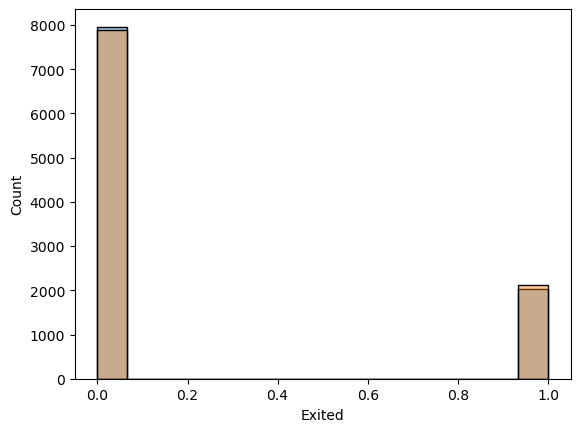

In [52]:
sns.histplot(data=df, x='Exited', alpha=0.4)
sns.histplot(data=df, x='Pred_Y', alpha=0.4)

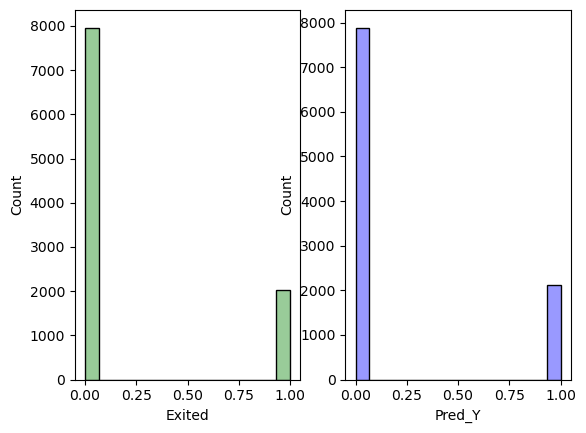

In [53]:
# fig = plt.figure()
fig, axs = plt.subplots(ncols=2, sharex=True)
# ax1 = plt.subplot(211)
# ax2 = plt.subplot(212)

# ax1.sharex(ax2)
# ax1.sharex(ax2)


sns.histplot(data=df, x='Exited', alpha=0.4, ax=axs[0], color='g')
sns.histplot(data=df, x='Pred_Y', alpha=0.4, ax=axs[1], color='b')
plt.show()